Source of dataset: https://www.kaggle.com/datasets/aparnashastry/building-permit-applications-data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('/Users/imac/Downloads/Building_Permits.csv', low_memory=False)

pd.set_option('display.max.columns', 45)
pd.set_option('display.max.rows', 200)
np.random.seed(0)
df.info()

# drop almost empty rows without core info
subset_columns = [ 'Existing Use', 'Existing Units', 'Proposed Use',
                  'Proposed Units', 'Existing Construction Type',
                  'Existing Construction Type Description', 'Proposed Construction Type',
                  'Proposed Construction Type Description']

# drop rows where all the columns in the subset have NaN values
df.dropna(subset=subset_columns, how='all', inplace=True, axis=0)
df.reset_index(drop=True, inplace=True)

df.tail(200)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,Unit,Unit Suffix,Description,Current Status,Current Status Date,Filed Date,Issued Date,Completed Date,First Construction Document Date,Structural Notification,Number of Existing Stories,Number of Proposed Stories,Voluntary Soft-Story Retrofit,Fire Only Permit,Permit Expiration Date,Estimated Cost,Revised Cost,Existing Use,Existing Units,Proposed Use,Proposed Units,Plansets,TIDF Compliance,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
160011,201802221994,8,otc alterations permit,02/22/2018,3774,067,501,NaN,02nd,St,NaN,NaN,to obtain final inspection for work approved u...,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,8.0,8.0,NaN,NaN,06/22/2018,1.00,1.00,office,NaN,office,NaN,0.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94107.0,"(37.783170816290614, -122.39290066380971)",1498095167201
160012,201802221995,8,otc alterations permit,02/22/2018,3774,067,501,NaN,02nd,St,NaN,NaN,to obtain final inspection for work approved u...,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,8.0,8.0,NaN,NaN,06/22/2018,1.00,1.00,office,NaN,office,NaN,0.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94107.0,"(37.783170816290614, -122.39290066380971)",1498097167201
160013,201802221996,8,otc alterations permit,02/22/2018,3774,067,501,NaN,02nd,St,NaN,NaN,to obtain final inspection for work approved u...,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,8.0,8.0,NaN,NaN,06/22/2018,1.00,1.00,office,NaN,office,NaN,0.0,NaN,1.0,constr type 1,1.0,constr type 1,NaN,6.0,Financial District/South Beach,94107.0,"(37.783170816290614, -122.39290066380971)",1498098167201
160014,201802222001,8,otc alterations permit,02/22/2018,6007,030,239,NaN,Naples,St,NaN,NaN,reroofing,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,1.0,1.0,NaN,NaN,08/22/2018,7680.00,7680.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,11.0,Excelsior,94112.0,"(37.724764995031194, -122.42789933364725)",1498099193758
160015,201802222002,8,otc alterations permit,02/22/2018,2619,062,38,NaN,Ord,Ct,NaN,NaN,re-roofing,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,2.0,2.0,NaN,NaN,08/22/2018,13400.00,14000.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,8.0,Castro/Upper Market,94114.0,"(37.764074429183346, -122.44092214567249)",1498100139695
160016,201802222005,8,otc alterations permit,02/22/2018,2414,004,2566,NaN,14th,Av,NaN,NaN,re-roofing,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,2.0,2.0,NaN,NaN,08/22/2018,10500.00,11000.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,7.0,West of Twin Peaks,94127.0,"(37.74024116177878, -122.46971931714113)",1498101135059
160017,201802222003,8,otc alterations permit,02/22/2018,3517,021,69,NaN,Kissling,St,NaN,NaN,reroofing,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,2.0,2.0,NaN,NaN,08/22/2018,7680.00,7680.00,2 family dwelling,2.0,2 family dwelling,2.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,6.0,South of Market,94103.0,"(37.772865523568456, -122.41447117202668)",1498102156568
160018,201802222004,8,otc alterations permit,02/22/2018,2025,001H,1735,NaN,24th,Av,NaN,NaN,reroofing,issued,02/22/2018,02/22/2018,02/22/2018,NaN,02/22/2018,NaN,1.0,1.0,NaN,NaN,08/22/2018,9680.00,9680.00,1 family dwelling,1.0,1 family dwelling,1.0,0.0,NaN,5.0,wood frame (5),5.0,wood frame (5),NaN,4.0,Sunset/Parkside,94122.0,"(37.75516384708472, -122.4822422263456)",1498103122402
160019,201802222007,8,otc alterations permit,02/22/2018,3738,011,301,NaN,Howard,St,NaN,NaN,3rd fl: t-24 e

Handling Missing Values

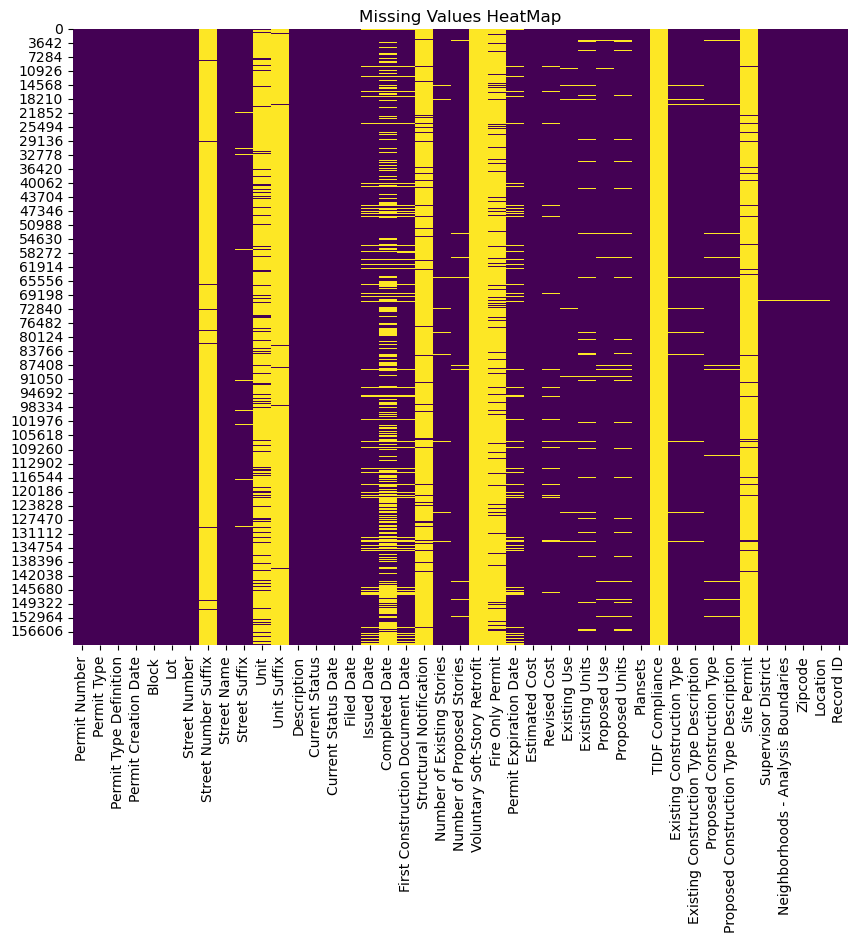

In [6]:
# visualization of missing values in the dataset
missing_values = df.isnull().sum(axis=0)

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values HeatMap')
plt.show()

~8 columns with extreme number of missing values
Street Number Suffix 
Unit, Unit Suffix 
Structural Notification Y/N column to fill
TIDF compliance 
Site Permit 

In [7]:
# checking for duplicated valaues
df.duplicated().any()

False

Street Number Suffix column

In [8]:
# to keep the address exact, we can transfer all non-NaN values from 'Street Number Suffix' to 'Street Number' and then drop this column
mask = ~df['Street Number Suffix'].isnull()

# combine 'Street Number' and 'Street Number Suffix' using the mask
df.loc[mask, 'Street Number'] = df.loc[mask, 'Street Number'].astype(str) + df.loc[mask, 'Street Number Suffix'].fillna('')

# drop the 'Street Number Suffix' column 
df.drop(columns=['Street Number Suffix'], inplace=True)


Unit, Unit Suffix, Voluntary Soft-Story Retrofit, TIDF compliance columns

In [9]:
# calculating exact percentage of values missing 'Unit'
total_column = len(df['Unit'])
NaN_values = df['Unit'].isnull().sum()
percentage = (NaN_values/total_column)*100
print('Percentage of values missing in the column "Unit": ', percentage)

# calculating exact percentage of values missing 'Unit Suffix'
total_column_suffix = len(df['Unit Suffix'])
NaN_values_suffix = df['Unit Suffix'].isnull().sum()
percentage_suffix = (NaN_values_suffix/total_column_suffix)*100
print('Percentage of values missing in the column "Unit Suffix": ', percentage_suffix)

# dropping columns with more than 85% of data missing
df.drop(columns=['Unit', 'Unit Suffix', 'Voluntary Soft-Story Retrofit', 'TIDF Compliance'], inplace=True)

Percentage of values missing in the column "Unit":  85.19077965932426
Percentage of values missing in the column "Unit Suffix":  99.02129067292508


Site Permit column

In [10]:
# calculating exact percentage of values missing 'Site Permit'
total_column_permit = len(df['Site Permit'])
NaN_values_Site_Permit = df['Site Permit'].isnull().sum()
percentage_Site_Permit = (NaN_values_Site_Permit/total_column_permit)*100
print('Percentage of values missing in the column "Site Permit": ', percentage_Site_Permit)

# dropping the column with more than 97% of missing values
df.drop(columns=['Site Permit'], inplace=True)

Percentage of values missing in the column "Site Permit":  96.65503617104943


Issued Date, Completed Date, First Construction Document Date column

In [11]:
df['Issued Date'].isnull().sum() # 14940 missing values

# fill NaNs with data from 'Filed Date' as it tends to be almost the same in all cases
df['Issued Date'].fillna(df['Filed Date'], inplace=True)

# fill NaNs in 'Completed Date' column
df['Completed Date'].isnull().sum() # 101709 missing values
mask = df['First Construction Document Date'] == df['Issued Date']
df.loc[mask, 'Completed Date'] = df.loc[mask, 'Issued Date']

df['Issued Date'].isnull().sum() # 0 missing
df['Completed Date'].isnull().sum() # reduced to 16634

# replace missing data with curr status dates, as it also tends to be the same
df['Completed Date'].fillna(df['Current Status'], inplace=True)

# 'First Construction Document Date' is later than 'Issued Date' for short period of time, 
# we will count the average difference and add it to issued date to fill missing values in FC Document Date
df['Issued Date'] = pd.to_datetime(df['Issued Date'])
df['First Construction Document Date'] = pd.to_datetime(df['First Construction Document Date'])

diff = (df['First Construction Document Date'] -  df['Issued Date']).dt.days
avg = diff.mean() # average difference between these date columns is 2 days

# to fill 'First Construction Document Date' missing values we will add 2 days to each Issued Date
df['First Construction Document Date'] = pd.to_datetime(df['First Construction Document Date'])
df['First Construction Document Date'].fillna(df['Issued Date'] + pd.Timedelta(days=2), inplace=True)

In [12]:
# 'Structural Notification' column
df['Structural Notification'].describe()
unique_values = df['Structural Notification'].unique()
unique_values  # Y, nan : we can assume that NaN values mean N (no notification) to fill the column

df['Structural Notification'].fillna('N',inplace=True)

Number of Existing Stories, Number of Proposed Stories

In [13]:
df['Number of Existing Stories'].isnull().sum() # 42784 missing 
df['Number of Proposed Stories'].isnull().sum() # 42868 missing

# if 'Existing Stories' is not NaN then fill missing values in 'Proposed Stories' with 0.0 as no additional floors was proposed
df.loc[~df['Number of Existing Stories'].isnull(), 'Number of Proposed Stories'] = df.loc[~df['Number of Existing Stories'].isnull(), 'Number of Proposed Stories'].fillna(0.0)
df['Number of Proposed Stories'].isnull().sum() # reduced to 39374

# if both are NaN fill with 0.0
mask1 = df['Number of Existing Stories'].isnull() & df['Number of Proposed Stories'].isnull()
df.loc[mask1, ['Number of Existing Stories','Number of Proposed Stories']] = 0.0

df['Number of Existing Stories'].isnull().sum() # reduced to 3410
df['Number of Proposed Stories'].isnull().sum() # 0

rows_with_all_missing = df[df['Number of Existing Stories'].isnull()]
rows_with_all_missing # checking for rows with missing values 

# if value in 'Proposed Stories' is not NaN fill 'Existing Stories' with 0.0
mask = ~df['Number of Proposed Stories'].isnull() & df['Number of Existing Stories'].isnull()
df.loc[mask, 'Number of Existing Stories'] = 0.0

df['Number of Existing Stories'].isnull().sum() # reduced to 0

0

Fire Only Permit, Permit Expiration Date (unavoidable missing data) column

In [14]:
df['Fire Only Permit'].describe()
unique_values = df['Structural Notification'].unique()
unique_values # we can assume that missing values can be filled with Y if the 'Permit Expiration Date' is not NaN

# if 'Permit Expiration Date' is not NaN fill 'Fire Only Permit' with 'Y'
df.loc[~df['Permit Expiration Date'].isnull(), 'Fire Only Permit'] = 'Y'

# fill 'Fire Only Permit' NaNs left with 'N'
df['Fire Only Permit'].fillna('N', inplace=True)

# Unavoidable Missing Data in 'Permit Expiration Date', change NaN to NaT
df['Permit Expiration Date'] = pd.to_datetime(df['Permit Expiration Date'])
mask = (df['Fire Only Permit'] == 'N') & df['Permit Expiration Date'].isnull()
df.loc[mask, 'Permit Expiration Date'] = pd.NaT


# fill missing values in 'Permit Expiration Date' with NaT if 'Fire Only Permit' has value 'Y'
mask = (df['Fire Only Permit'] == 'Y') & df['Permit Expiration Date'].isnull()
df.loc[mask, 'Permit Expiration Date'] = pd.NaT


Estimated Cost, Revised Cost columns

In [15]:
df['Estimated Cost'].fillna(df['Revised Cost'], inplace=True)
df['Revised Cost'].fillna(df['Estimated Cost'], inplace=True)

df['Estimated Cost'] = df['Estimated Cost'].astype(float)
df['Revised Cost'] = df['Revised Cost'].astype(float)

# if both columns are NaN on the same row level change to 0.0
both_nan_mask = df['Estimated Cost'].isnull() & df['Revised Cost'].isnull()
df.loc[both_nan_mask, ['Estimated Cost', 'Revised Cost']] = 0.0

df['Estimated Cost'].isnull().sum()
df['Revised Cost'].isnull().sum()

0

Existing Use, Proposed Use columns

In [16]:
df['Existing Use'].fillna(df['Proposed Use'], inplace=True)
df['Proposed Use'].fillna(df['Existing Use'], inplace=True)

mode_existing_use = df['Existing Use'].mode()[0]
mode_proposed_use = df['Proposed Use'].mode()[0]

df['Existing Use'].fillna(mode_existing_use, inplace=True)
df['Proposed Use'].fillna(mode_proposed_use, inplace=True)

Existing Units, Proposed Units column

In [17]:
df['Existing Units'].isnull().sum() # 12849 missing
df['Proposed Units'].isnull().sum() # 12222 missing

df['Existing Units'] = df['Existing Units'].astype(float)
df['Proposed Units'] = df['Proposed Units'].astype(float)

# if both columns are NaN on the same row level change to 0.0
both_nan_mask = df['Existing Units'].isnull() & df['Proposed Units'].isnull()
df.loc[both_nan_mask, ['Existing Units', 'Proposed Units']] = 0.0

df['Existing Units'].isnull().sum()  # 3015 missing
df['Proposed Units'].isnull().sum() # 2388 missing

# if 'Proposed Units' has values, set NaNs in existing values to 0.0 (there was no existing units)
mask = (~df['Proposed Units'].isnull()) & (df['Existing Units'].isnull())
df.loc[mask, 'Existing Units'] = 0.0

# if 'Existing Units' has values, set NaNs in proposed to 0.0 (no propose to change)
mask = (~df['Existing Units'].isnull()) & (df['Proposed Units'].isnull())
df.loc[mask, 'Proposed Units'] = 0.0


In [18]:
# 'Plansets' column  has 1 missing value, will replace it with average
df['Plansets'] = df['Plansets'].astype(float)

mean = df['Plansets'].mean()
df['Plansets'].fillna(mean,inplace=True)

Existing Construction Type, Proposed Construction Type column

In [19]:
df['Existing Construction Type'].isnull().sum() # 4677 missing
df['Proposed Construction Type'].isnull().sum() # 4473 missing

df['Existing Construction Type'] = df['Existing Construction Type'].astype(float)
df['Proposed Construction Type'] = df['Proposed Construction Type'].astype(float)

# if there was no construction type proposed, it remains the same
df['Proposed Construction Type'].fillna(df['Existing Construction Type'],inplace=True)

df['Proposed Construction Type'].isnull().sum() # 934 missing

# if existing construction type is NaN and proposed has value - set 'Existing Construction Type' to 0.0
mask = df['Existing Construction Type'].isnull() & ~df['Proposed Units'].isnull()
df.loc[mask, 'Existing Construction Type'] = 0.0

# calculate mode value in each column to fill NaNs
mode = df['Existing Construction Type'].mode().iloc[0]
mode1 = df['Proposed Construction Type'].mode().iloc[0]


df['Proposed Construction Type'].fillna(mode1, inplace=True)
df['Existing Construction Type'].fillna(mode, inplace=True)

Existing Construction Type Description, Proposed Construction Type Description columns

In [20]:
# if there is no proposed, fill it with 'Existing Construction Type Description'
df['Proposed Construction Type Description'].fillna(df['Existing Construction Type Description'], inplace=True)

df['Existing Construction Type Description'].isnull().sum() # 4677
df['Proposed Construction Type Description'].isnull().sum() # 934

# replace values in 'Existing Construction Type Description' if there is a record of its type in previous column
unique = df['Existing Construction Type Description'].unique()
unique

# if 'Existing Construction Type' == 1.0 then NaN value in 'Existing Construction Type Description' == 'constr type 1'
mask_1 = (df['Existing Construction Type'] == 1.0) & df['Existing Construction Type Description'].isnull()

# if 'Existing Construction Type' == 2.0 then NaN value in 'Existing Construction Type Description' == 'constr type 2'
mask_2 = (df['Existing Construction Type'] == 2.0) & df['Existing Construction Type Description'].isnull()

# if 'Existing Construction Type' == 3.0 then NaN value in 'Existing Construction Type Description'== 'constr type 3'
mask_3 = (df['Existing Construction Type'] == 3.0) & df['Existing Construction Type Description'].isnull()

# if 'Existing Construction Type' == 4.0 then NaN value in 'Existing Construction Type Description' == 'constr type 4'
mask_4 = (df['Existing Construction Type'] == 4.0) & df['Existing Construction Type Description'].isnull()

# if 'Existing Construction Type' == 5.0 then NaN value in 'Existing Construction Type Description' == 'wood frame (5)'
mask_5 = (df['Existing Construction Type'] == 5.0) & df['Existing Construction Type Description'].isnull()

df.loc[mask_1, 'Existing Construction Type Description'] = 'constr type 1'
df.loc[mask_2, 'Existing Construction Type Description'] = 'constr type 2'
df.loc[mask_3, 'Existing Construction Type Description'] = 'constr type 3'
df.loc[mask_4, 'Existing Construction Type Description'] = 'constr type 4'
df.loc[mask_5, 'Existing Construction Type Description'] = 'wood frame (5)'

mask_0 = (df['Existing Construction Type'] == 0.0) & df['Existing Construction Type Description'].isnull()
df.loc[mask_0, 'Existing Construction Type Description'] = 'no construction type'

df['Proposed Construction Type Description'].fillna(df['Existing Construction Type Description'], inplace=True)

In [21]:
# 'Street Suffix'
df['Street Suffix'].fillna('no info', inplace=True)

# 'Supervisor District'
df['Supervisor District'].isnull().sum() # 1106 missing

df['Supervisor District'] = df['Supervisor District'].astype(float)
df['Supervisor District'].fillna(0.0, inplace = True)

# 'Neighborhoods - Analysis Boundaries'
df['Neighborhoods - Analysis Boundaries'].isnull().sum() # 1114 missing
df['Neighborhoods - Analysis Boundaries'].fillna('no info', inplace=True)

# 'Zipcode'
df['Zipcode'].isnull().sum() # 1105 missing
df['Zipcode'].fillna(0.0, inplace = True)
df['Zipcode'] = df['Zipcode'].astype(int)

# 'Location' 
df['Location'].isnull().sum() # 1092 missing
df['Location'].fillna('(0,0)', inplace=True)

# check 'Record ID' for missing values
df['Record ID'].isnull().sum()

0

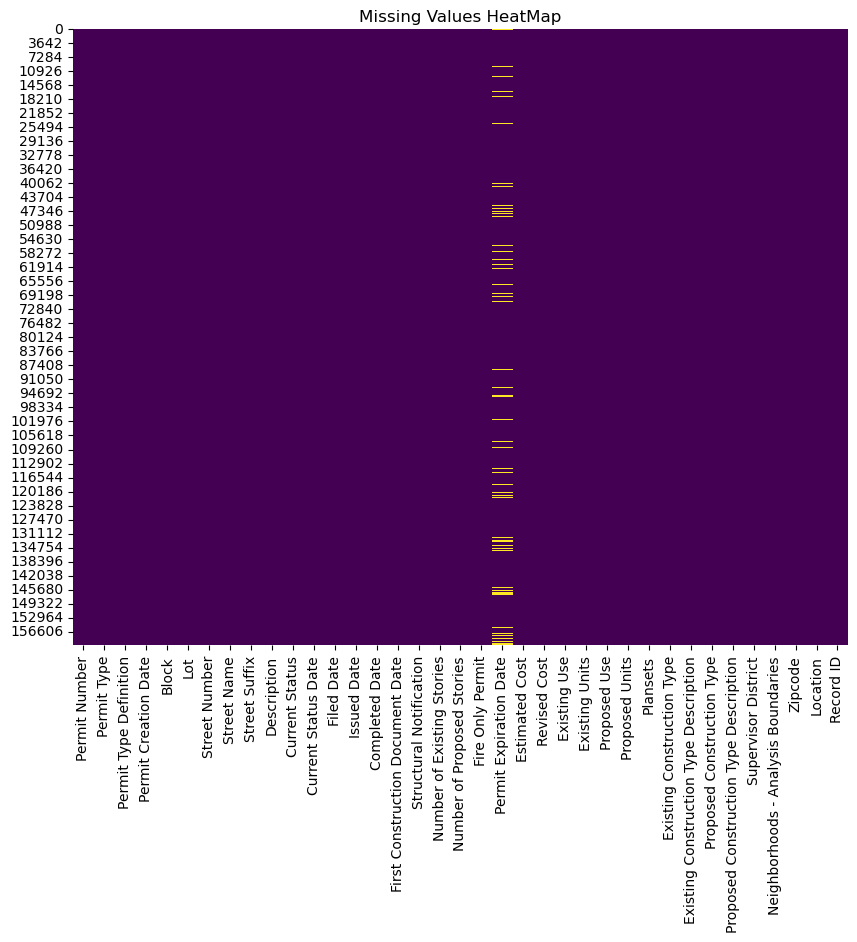

In [22]:
# checking heatmap again
missing_values = df.isnull().sum(axis=0)

plt.figure(figsize=(10,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values HeatMap')
plt.show()
